In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from numpy import load
from numpy import genfromtxt

In [ ]:
Dimension = '3D'
#Dimension = '2D'

Size = '160x160'
#Size = '240x240'

#Label = 'Bones'
Label = 'Joins'
#Label = 'Fingers'

Model = 'Transfer_Learning'
#Model = 'Created'

In [ ]:
Type_Model = Model + '_' + Dimension
Type_Data = Dimension + '_' + Label

path = '/content/drive/MyDrive/1. Personal Project - Marcelo Garcia/AI_Project/Hand/New_Points/' + Type_Data + '/' 
path_models = '/content/drive/MyDrive/1. Personal Project - Marcelo Garcia/AI_Project/Hand/Models/' + Type_Model + '/' + Label + '/'
path_x = '/content/drive/MyDrive/1. Personal Project - Marcelo Garcia/AI_Project/Hand/New_Points/' + Type_Data + '/' 

In [ ]:
x_test = load(path_x + 'Test/' +  'x_test_' + Dimension + '_' + Size + '.npy')

In [ ]:
def Test_model(points, test_list):
  test_list = []
  for point in range(0, len(points)):

    Selected_model = tf.keras.models.load_model(path_models  + points[point] + '_model_' + Type_Model + '_' + Size + '.h5', custom_objects = {'KerasLayer': hub.KerasLayer})
    test = genfromtxt(path + 'Test/' + points[point] +'_Test' + '_' + Dimension + '_' + Size + '.csv', delimiter=",")

    [x, y] = Selected_model.evaluate(x_test, test,verbose=1)

    test_list.append([points[point], y])
    print(points[point] + ' Test Accuracy: '+ "{:.0%}".format(y))
    

  print(test_list)

In [ ]:
list_joins = ['cero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen', 'twenty']
list_bones = ['Carpals_1', 'Metacarpals_1', 'Proxima_phalanges_1', 'Distal_phalanges_1', 'Metacarpals_2', 'Proxima_phalanges_2', 'Intermediate_phalanges_2', 'Distal_phalanges_2', 'Metacarpals_3', 'Proxima_phalanges_3', 'Intermediate_phalanges_3', 'Distal_phalanges_3', 'Metacarpals_4', 'Proxima_phalanges_4', 'Intermediate_phalanges_4', 'Distal_phalanges_4', 'Metacarpals_5', 'Proxima_phalanges_5', 'Intermediate_phalanges_5', 'Distal_phalanges_5']
list_fingers = ['Thumb', 'Index_finger', 'Middle_finger', 'Ring_finger', 'Pinky']

In [ ]:
Test_model(list_joins, 'test_joins')

47/47 [==============================] - 39s 94ms/step - loss: 0.0129 - accuracy: 0.9521
cero Test Accuracy: 95%
47/47 [==============================] - 3s 66ms/step - loss: 0.0068 - accuracy: 0.9555
one Test Accuracy: 96%
47/47 [==============================] - 3s 67ms/step - loss: 0.0069 - accuracy: 0.9150
two Test Accuracy: 91%
47/47 [==============================] - 3s 68ms/step - loss: 0.0093 - accuracy: 0.8806
three Test Accuracy: 88%
47/47 [==============================] - 3s 68ms/step - loss: 0.0158 - accuracy: 0.8860
four Test Accuracy: 89%
47/47 [==============================] - 3s 68ms/step - loss: 0.0033 - accuracy: 0.8873
five Test Accuracy: 89%
47/47 [==============================] - 3s 68ms/step - loss: 0.0035 - accuracy: 0.9116
six Test Accuracy: 91%
47/47 [==============================] - 3s 69ms/step - loss: 0.0053 - accuracy: 0.9224
seven Test Accuracy: 92%
47/47 [==============================] - 3s 69ms/step - loss: 0.0083 - accuracy: 0.9278
eight Test Accur

In [ ]:
pd_test_bones = pd.DataFrame(test_bones)
pd_test_fingers = pd.DataFrame(test_fingers)
pd_test_joins = pd.DataFrame(test_joins)

In [ ]:
print('Bones Accuracy: ' + '{:.0%},'.format(pd_test_bones.iloc[:,1].mean()), 'Fingers Accuracy: ' + '{:.0%},'.format(pd_test_fingers.iloc[:,1].mean()), 'Joins Accuracy: ' + '{:.0%},'.format(pd_test_joins.iloc[:,1].mean()))

Bones Accuracy: 77%, Fingers Accuracy: 54%, Joins Accuracy: 90%,


Prediction

In [ ]:
q = np.random.randint(0, len(x_test))

img = x_test[q]

img = img.reshape(1, 160, 160, 3)
img.shape

(1, 160, 160, 3)

In [ ]:
q = 0

(1, 160, 160, 3)

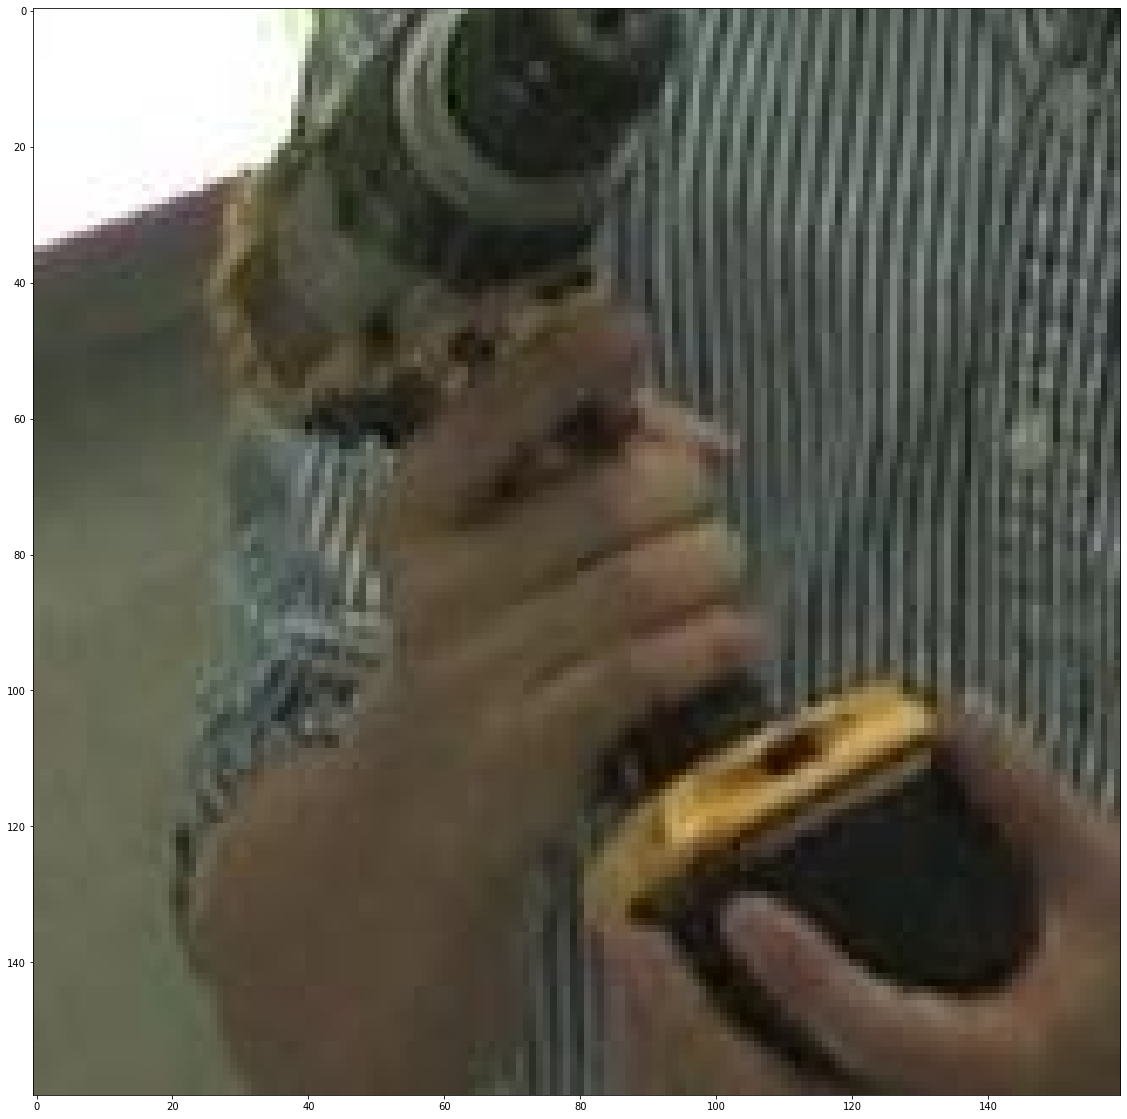

In [ ]:
import matplotlib.pyplot as plt

x_test[q].shape

im = x_test[q]
plt.imshow(im)

img = im.reshape(1, 160, 160, 3)
img.shape

In [ ]:
prediction_list = []

def Prediction(points, prediction_list):
  
  for point in range(0, len(points)):

    Selected_model = tf.keras.models.load_model(path_models  + points[point] + '_model_' + Type_Model + '_' + Size + '.h5', custom_objects = {'KerasLayer': hub.KerasLayer})
    Prediction = Selected_model.predict(img)

    prediction_list.append([Prediction[0][0], Prediction[0][1], 1])
    print(Prediction[0][0], Prediction[0][1], 1)
    
  return prediction_list

In [ ]:
Prediction(list_joins, prediction_list)

65.83675 105.768524 1
70.696205 98.54276 1
76.61938 70.148605 1
83.55696 66.70586 1
93.56217 66.84712 1
57.54244 77.82561 1
69.83516 63.521496 1
76.15019 59.652935 1
87.24503 53.802467 1
62.323963 84.4093 1
85.3329 81.42234 1
103.304665 74.00376 1
103.398865 74.481735 1
67.16336 96.74117 1
90.88588 93.249374 1
95.90538 83.21467 1
99.32085 84.67841 1
79.06248 116.03655 1
86.01124 98.42362 1
97.487946 95.446045 1
101.03574 96.21292 1


[[65.83675, 105.768524, 1],
 [70.696205, 98.54276, 1],
 [76.61938, 70.148605, 1],
 [83.55696, 66.70586, 1],
 [93.56217, 66.84712, 1],
 [57.54244, 77.82561, 1],
 [69.83516, 63.521496, 1],
 [76.15019, 59.652935, 1],
 [87.24503, 53.802467, 1],
 [62.323963, 84.4093, 1],
 [85.3329, 81.42234, 1],
 [103.304665, 74.00376, 1],
 [103.398865, 74.481735, 1],
 [67.16336, 96.74117, 1],
 [90.88588, 93.249374, 1],
 [95.90538, 83.21467, 1],
 [99.32085, 84.67841, 1],
 [79.06248, 116.03655, 1],
 [86.01124, 98.42362, 1],
 [97.487946, 95.446045, 1],
 [101.03574, 96.21292, 1]]

In [ ]:
new_points = np.array(prediction_list)
new_points.shape

(21, 3)

(-0.5, 159.5, 159.5, -0.5)

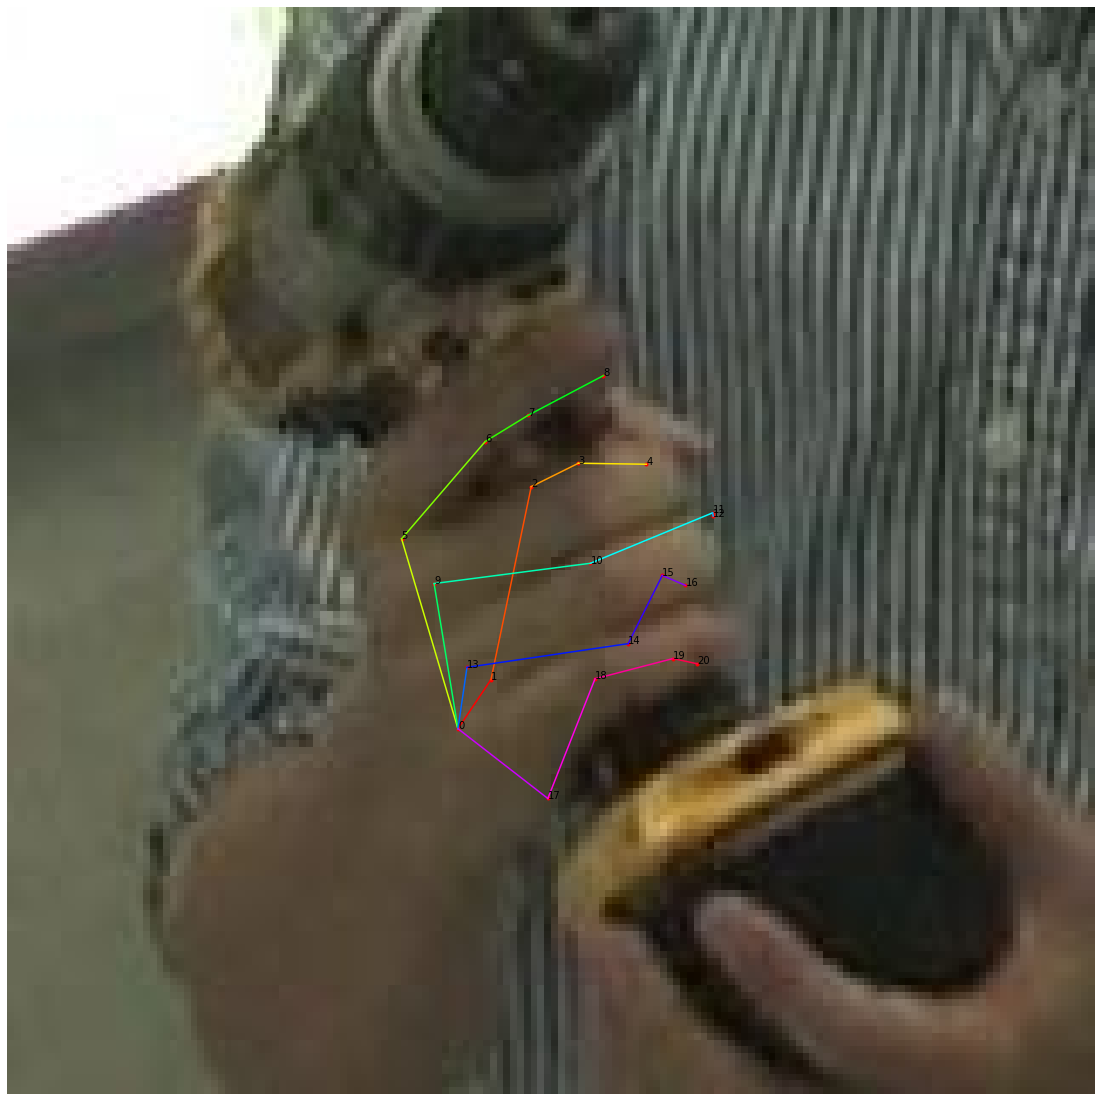

In [ ]:
import os
import os.path
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

edges = [[0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20]]

outpath = './output_viz/'
if not os.path.isdir(outpath):
    os.makedirs(outpath)

invalid = new_points[:,2]!=1

# Plot annotations
plt.clf()
plt.imshow(im)

for p in range(new_points.shape[0]):
    if new_points[p,2]!=0:
        plt.plot(new_points[p,0], new_points[p,1],'r.')
        plt.text(new_points[p,0], new_points[p,1], '{0}'.format(p))
for ie, e in enumerate(edges):
    if np.all(new_points[e,2]!=0):
        rgb = matplotlib.colors.hsv_to_rgb([ie/float(len(edges)),1.0,1.0])
        plt.plot(new_points[e,0],new_points[e,1],color=rgb)
plt.axis('off')

In [ ]:
test_list = []

def Test_points(points, test_list):
  
  for point in range(0, len(points)):

    test = genfromtxt(path + 'Test/' + points[point] +'_Test' + '_' + Dimension + '_' + Size + '.csv', delimiter=",")

    test_list.append([test[q][0], test[q][1], 1])
    print('Done ' + points[point])
    
  return test_list

In [ ]:
Test_points(list_joins, test_list)

Done cero
Done one
Done two
Done three
Done four
Done five
Done six
Done seven
Done eight
Done nine
Done ten
Done eleven
Done twelve
Done thirteen
Done fourteen
Done fifteen
Done sixteen
Done seventeen
Done eighteen
Done nineteen
Done twenty


[[68.42200000000003, 106.51250000000005, 1],
 [69.48399999999992, 92.22050000000002, 1],
 [74.678, 69.95450000000005, 1],
 [87.60199999999998, 62.80250000000001, 1],
 [99.88199999999995, 67.60450000000003, 1],
 [55.74199999999996, 76.02850000000001, 1],
 [68.25, 63.5005000000001, 1],
 [79.10299999999995, 55.61650000000009, 1],
 [88.27099999999996, 50.48650000000009, 1],
 [60.45799999999997, 89.0865, 1],
 [84.70299999999997, 76.24350000000004, 1],
 [96.12299999999993, 73.8225000000001, 1],
 [98.75999999999999, 74.9085, 1],
 [66.61900000000003, 99.74150000000009, 1],
 [89.14699999999993, 88.99450000000002, 1],
 [99.83299999999997, 85.78950000000009, 1],
 [101.71500000000003, 86.07650000000001, 1],
 [73.88499999999999, 109.51350000000002, 1],
 [91.543, 101.06050000000005, 1],
 [100.33699999999999, 97.31150000000002, 1],
 [104.25799999999992, 96.45850000000007, 1]]

In [ ]:
original_points = np.array(test_list)
original_points.shape

(21, 3)

(-0.5, 159.5, 159.5, -0.5)

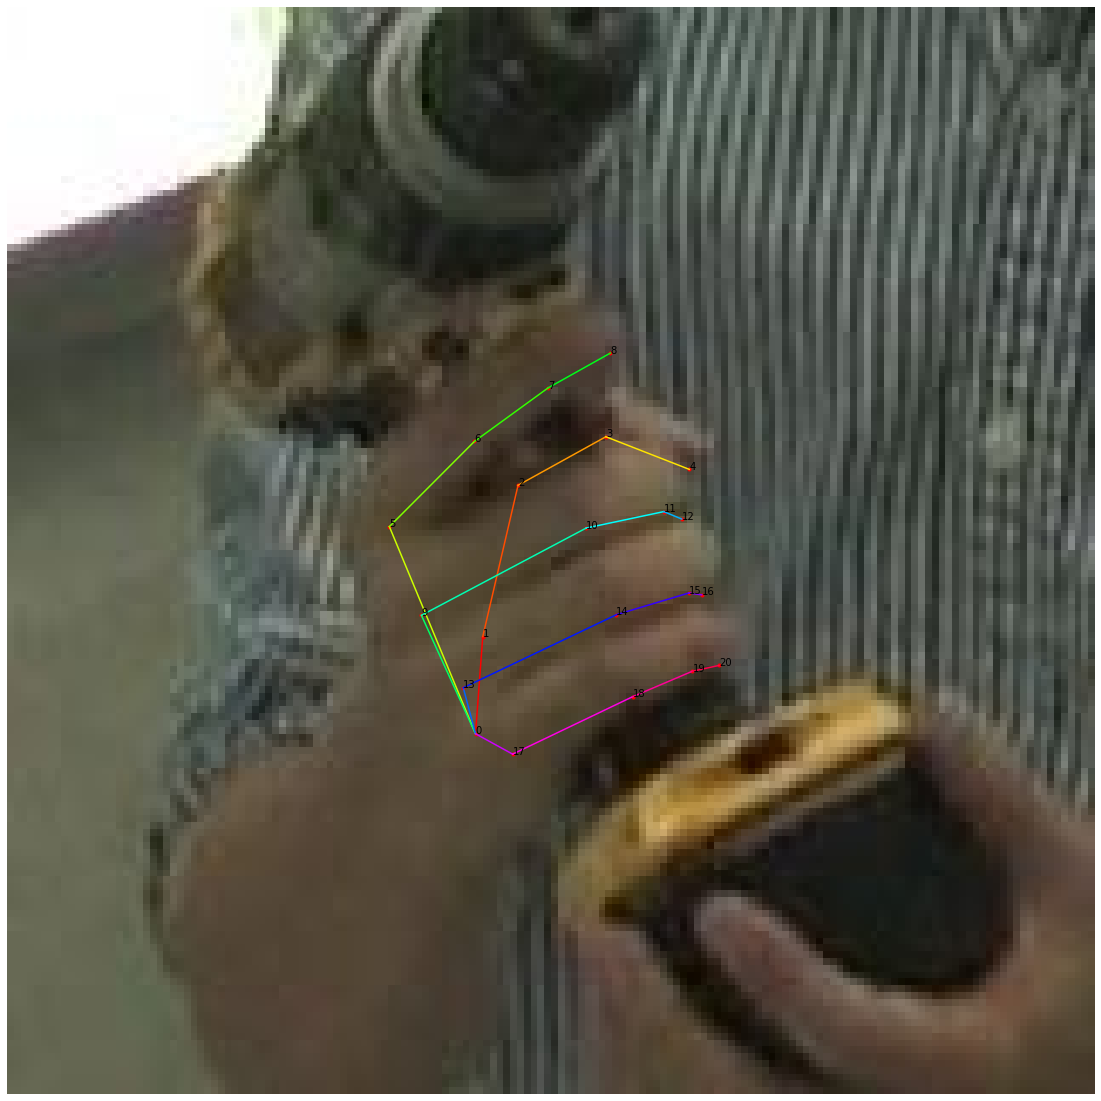

In [ ]:
import os
import os.path
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

edges = [[0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20]]

outpath = './output_viz/'
if not os.path.isdir(outpath):
    os.makedirs(outpath)

invalid = original_points[:,2]!=1

# Plot annotations
plt.clf()
plt.imshow(im)

for p in range(original_points.shape[0]):
    if original_points[p,2]!=0:
        plt.plot(original_points[p,0], original_points[p,1],'r.')
        plt.text(original_points[p,0], original_points[p,1], '{0}'.format(p))
for ie, e in enumerate(edges):
    if np.all(original_points[e,2]!=0):
        rgb = matplotlib.colors.hsv_to_rgb([ie/float(len(edges)),1.0,1.0])
        plt.plot(original_points[e,0],original_points[e,1],color=rgb)
plt.axis('off')

In [ ]:
diference = []

for x in range(len(prediction_joins)):
  z = original_points[x][0] - prediction_joins[x][0]
  y = original_points[x][1] - prediction_joins[x][1]
  diference.append([z,y])

In [ ]:
diference = pd.DataFrame(diference)

In [ ]:
diference.describe()

,0,1
count,21.000000,21.000000
mean,6.987970,-3.196716
std,28.321878,8.086175
min,-34.553330,-15.902890
25%,-16.769696,-6.336500
50%,9.389514,-4.533380
75%,35.790550,-0.236020
max,51.856975,16.953255
